In [25]:
#import statements
import pandas as pd 
import numpy as np 
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

### Initial Exploratory Data Analyses    
We will analyze the Philadelphia Housing dataset.   

In [26]:
df = pd.read_csv("../processing/eda.csv")
df = df[(df['sale_price']>1000)&(df['sale_price']<5000000)]
df = df[df['sale_year'] > 2009]

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
df['sale_price'].describe()

count    1.802930e+05
mean     2.309736e+05
std      3.336692e+05
min      1.001000e+03
25%      7.361500e+04
50%      1.550000e+05
75%      2.675000e+05
max      4.950000e+06
Name: sale_price, dtype: float64

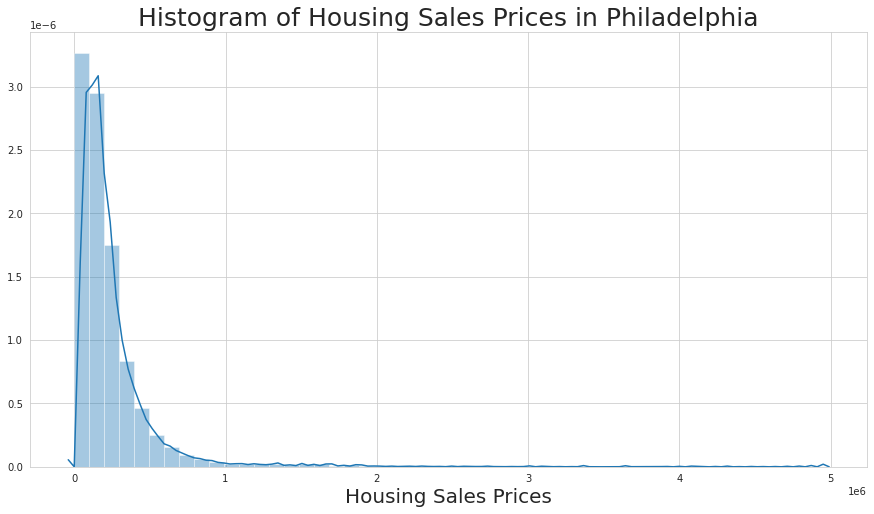

In [27]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.distplot(df['sale_price'])
plt.title("Histogram of Housing Sales Prices in Philadelphia", fontsize=25)
plt.xlabel("Housing Sales Prices", fontsize=20)
plt.show()

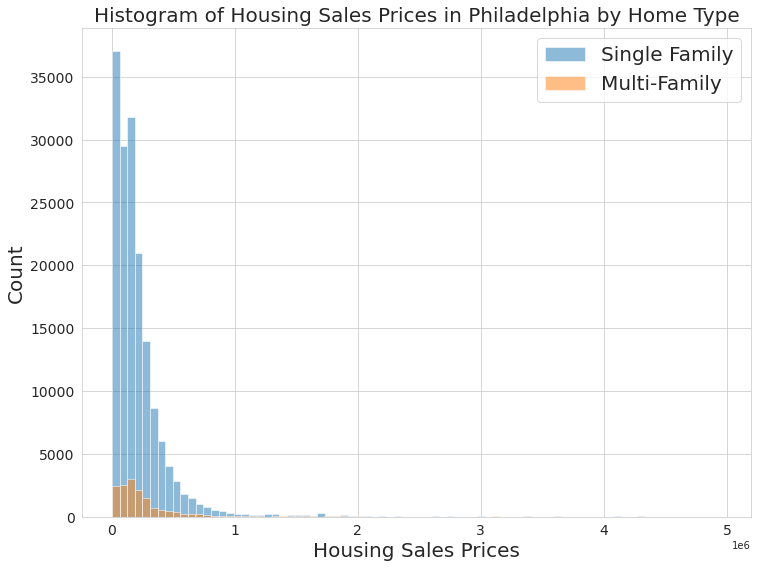

In [54]:
plt.rcParams['figure.figsize'] = [12, 9]  
plt.hist(df[df['category_code_description'] == "Single Family"]['sale_price'],
         bins = 80, alpha=0.5, label="Single Family")
plt.hist(df[df['category_code_description'] == "Multi Family"]['sale_price'],
         bins = 80, alpha=0.5, label="Multi-Family")
plt.xlabel("Housing Sales Prices", size=20)
plt.ylabel("Count", size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Histogram of Housing Sales Prices in Philadelphia by Home Type", fontsize = 20)
plt.legend(loc='upper right', fontsize = 20)
plt.show()

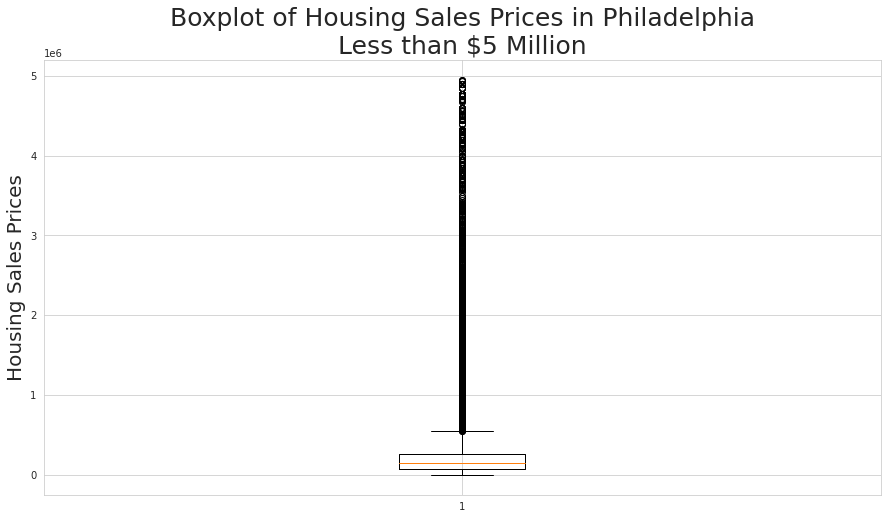

In [28]:
plt.figure(figsize=(15,8))
plt.boxplot(df['sale_price'])
plt.title("Boxplot of Housing Sales Prices in Philadelphia\nLess than $5 Million", fontsize=25)
plt.ylabel("Housing Sales Prices", fontsize=20)
# show plot
plt.show()

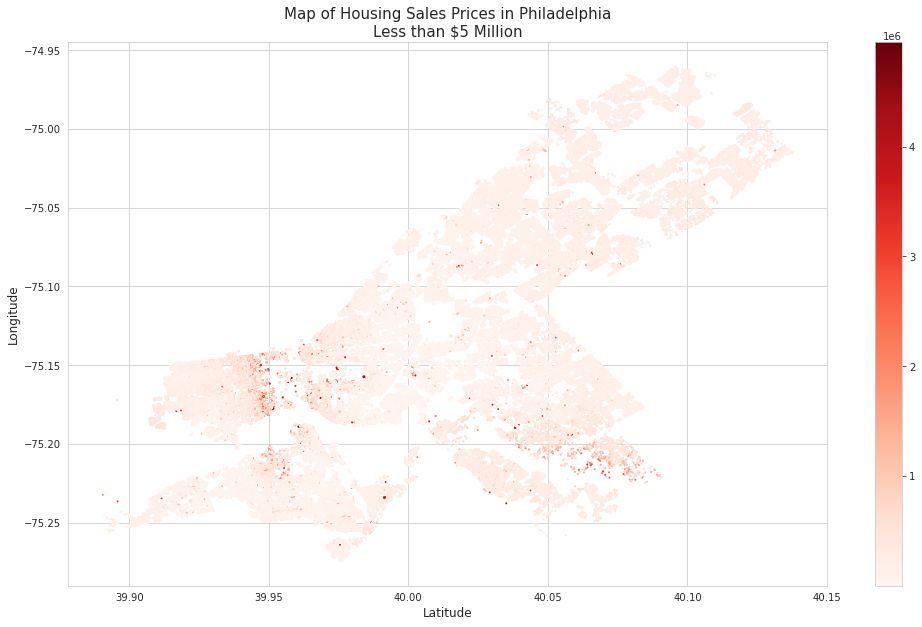

In [29]:
plt.figure(figsize=(17,10))
plt.scatter(x=df['lng'], y=df['lat'],
            s=1,
            c = df['sale_price'],
            cmap="Reds")
plt.colorbar()
plt.title("Map of Housing Sales Prices in Philadelphia\nLess than $5 Million", fontsize=15)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.show()
#color maps: https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html

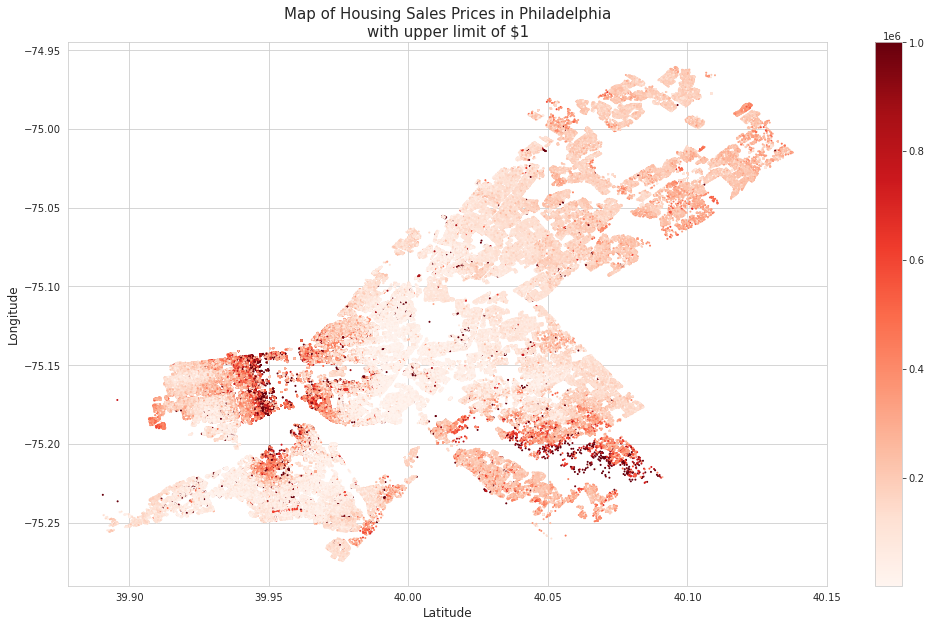

In [50]:
df_maxVal = df.copy()
#set upper limit
maxVal = 1_000_000
df_maxVal['sale_price'] = df_maxVal['sale_price'].where(df_maxVal['sale_price'] <= maxVal, maxVal) 

plt.figure(figsize=(17,10))
plt.scatter(x=df_maxVal['lng'], y=df_maxVal['lat'],
            s=1,
            c = df_maxVal['sale_price'],
            cmap="Reds")
plt.colorbar()
plt.title("Map of Housing Sales Prices in Philadelphia\nwith upper limit of $1", fontsize=15)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()
#color maps: https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html

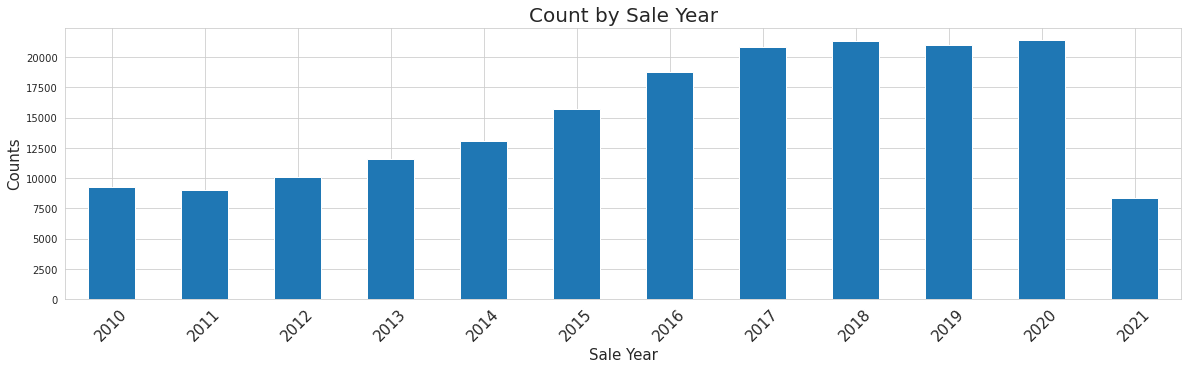

In [45]:
plt.figure(figsize=(10,6))
df['sale_year'].value_counts().sort_index(ascending=True).plot(kind='bar',figsize=(20,5))
plt.xlabel("Sale Year", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.title("Count by Sale Year", fontsize = 20)
plt.xticks(rotation=45)
plt.xticks(size=15)
plt.show()    

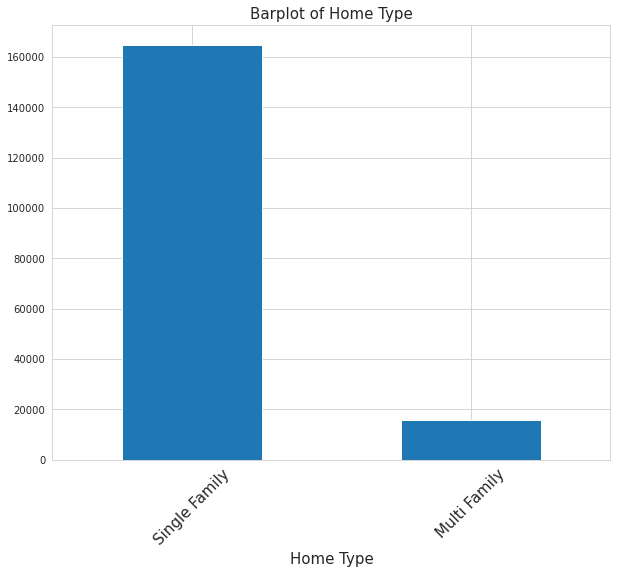

In [39]:
plt.figure(figsize=(10,8))
df.category_code_description.value_counts().plot(kind='bar')
plt.title('Barplot of Home Type', fontsize = 15)
plt.xlabel('Home Type', fontsize = 15)
plt.xticks(rotation=45)
plt.xticks(size=15)
plt.show()

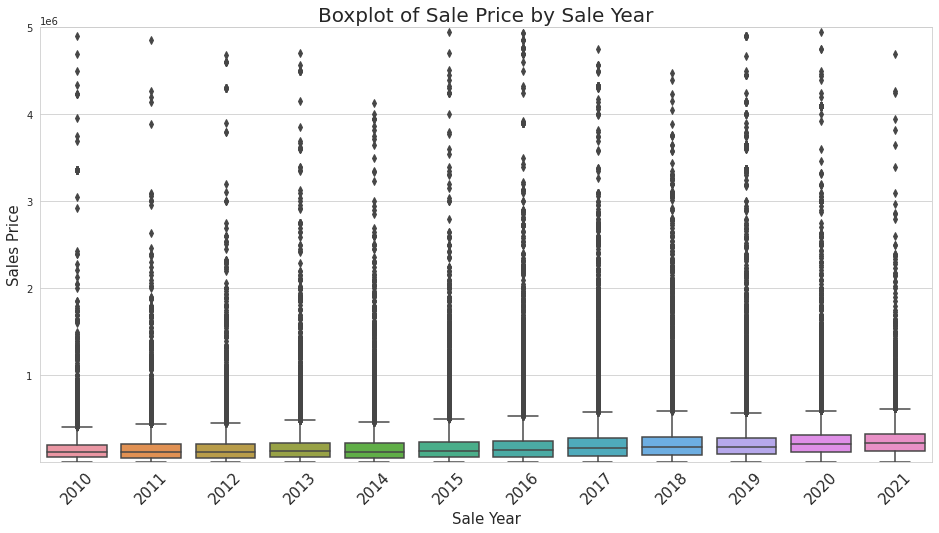

In [46]:
analysis = pd.concat([df['sale_price'], df['sale_year']], axis =1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=sale_year, y='sale_price', data=analysis)
fig.axis(ymin=1000, ymax=5000000)
plt.xlabel("Sale Year", fontsize=15)
plt.ylabel("Sales Price", fontsize=15)
plt.title("Boxplot of Sale Price by Sale Year", fontsize = 20)
plt.xticks(rotation=45)
plt.xticks(size=15)
plt.show()    

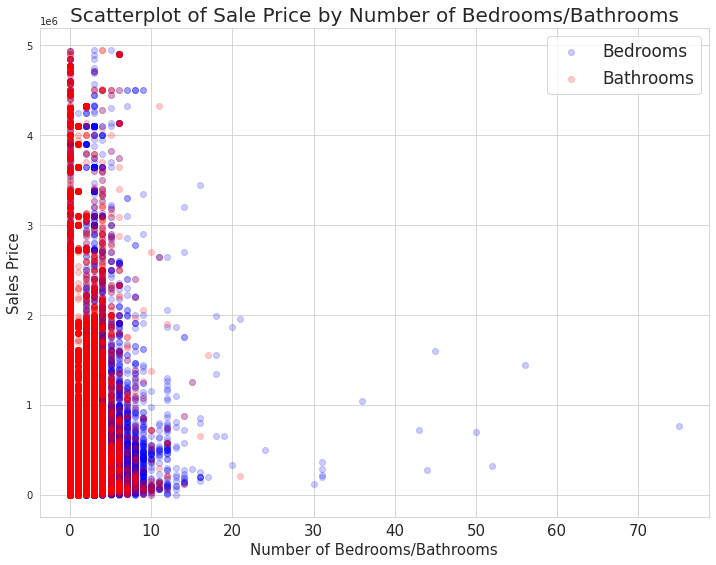

In [68]:
ap = plt.scatter(df['number_of_bedrooms'], 
            df['sale_price'], c ="blue",
            alpha=0.2)
 
bp = plt.scatter(df['number_of_bathrooms'],
            df['sale_price'], c ="red",
            alpha=0.2)
plt.legend((ap,bp),
       ('Bedrooms', 'Bathrooms'), fontsize = 17)
plt.xlabel("Number of Bedrooms/Bathrooms", fontsize=15)
plt.ylabel("Sales Price", fontsize=15)
plt.title("Scatterplot of Sale Price by Number of Bedrooms/Bathrooms", fontsize = 20)
plt.xticks(size=15)
plt.show()   